In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import requests
import shutil
import cv2

In [29]:
gene2lit = pd.read_csv('../data/pubtator_title_or_abstract_in_any_gene2pubmed_paper_no_reviews.csv')

In [9]:
gene_info = pd.read_csv('../data/gene_info_221228.csv')

In [13]:
genes = np.unique(gene_info['gene_ncbi'])

In [46]:
gene_otd = np.random.choice(genes)

In [47]:
gene_slice = gene_info[gene_info['gene_ncbi'] == gene_otd]

In [55]:
gene_slice['pdb_id'].values[0].lower()

'1bf9'

In [60]:
url = 'https://www.ebi.ac.uk/pdbe/static/entry/' + \
gene_slice['pdb_id'].values[0].lower() + \
'_assembly_1_chain_front_image-800x800.png'
filename = '../img/' + gene_slice['pdb_id'].values[0].lower() + '.png'

r = requests.get(url, stream = True)

if r.status_code == 200:
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
else:
    print('Image Couldn\'t be retrieved')

In [63]:
img = mpl.image.imread(filename)

In [44]:
gene2lit_slice = gene2lit[gene2lit['gene_ncbi'] == gene_otd]

In [39]:
groupby_year = gene2lit_slice.groupby('year').count().reindex(range(1970,2021)).fillna(0.0)['pubmed_id']

(-0.5, 799.5, 799.5, -0.5)

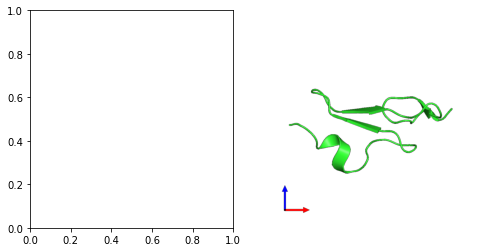

In [71]:
fig, axes = plt.subplots(figsize=(8,4), nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,1]})

axes[1].imshow(img)
axes[1].axis(False)